In [27]:
from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import numpy as np

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

### NeuralNetwork

With the test_network class it's easy to test new combinations parameters

CUDA detected


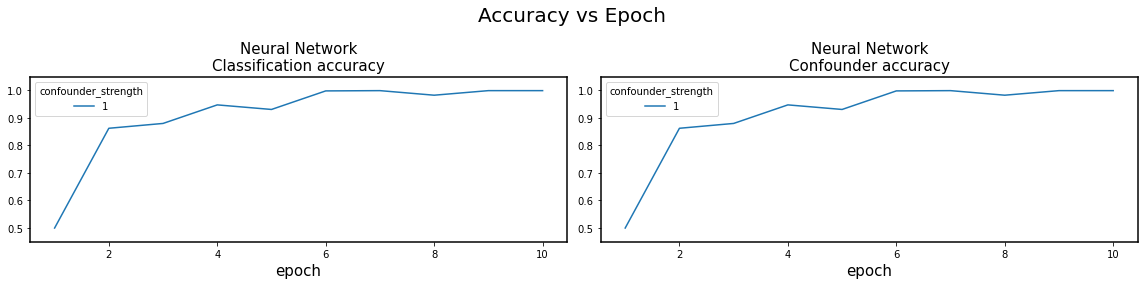

In [6]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### SimpleConv

CUDA detected


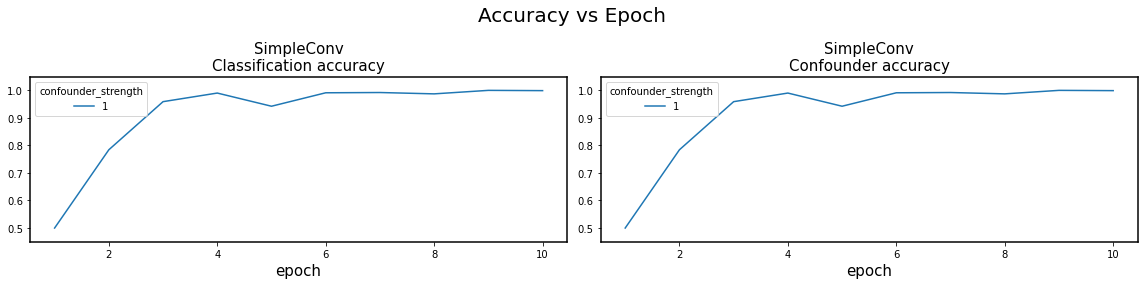

In [7]:
model = Models.SimpleConv()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### ConvNet

CUDA detected


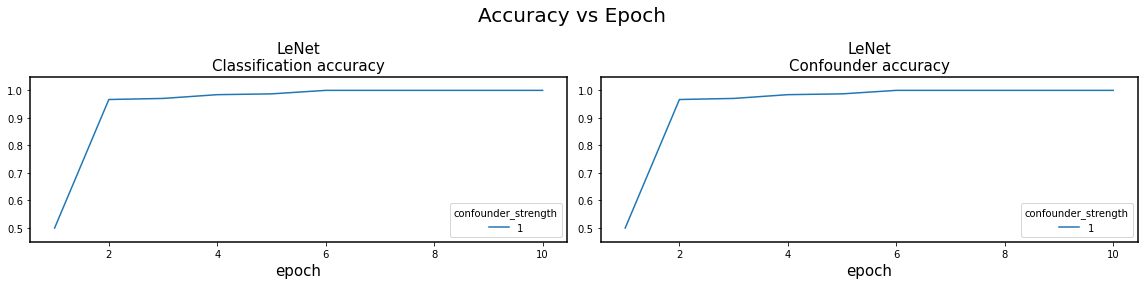

In [8]:
model = Models.LeNet_5()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Br_Net

In [9]:
model = Models.Br_Net()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})

CUDA detected


,confounder_strength,model_name,epoch,classification_accuracy,confounder_accuracy
0,1,BrNet,1,0.500000,0.500000
1,1,BrNet,2,0.500000,0.500000
2,1,BrNet,3,0.854492,0.854492
3,1,BrNet,4,0.500000,0.500000
4,1,BrNet,5,0.566406,0.566406
5,1,BrNet,6,1.000000,1.000000
6,1,BrNet,7,1.000000,1.000000
7,1,BrNet,8,1.000000,1.000000
8,1,BrNet,9,0.991211,0.991211
9,1,BrNet,10,0.986328,0.986328


## Testing new plotting framework

In [10]:
importlib.reload(CI)
model = Models.SimpleConv()
c = CI.confounder()
c.generate_data(mode="br-net", samples=128, test_confounding=[0,0.5,1])
c.train(model=model, epochs=100, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
print()

CUDA detected



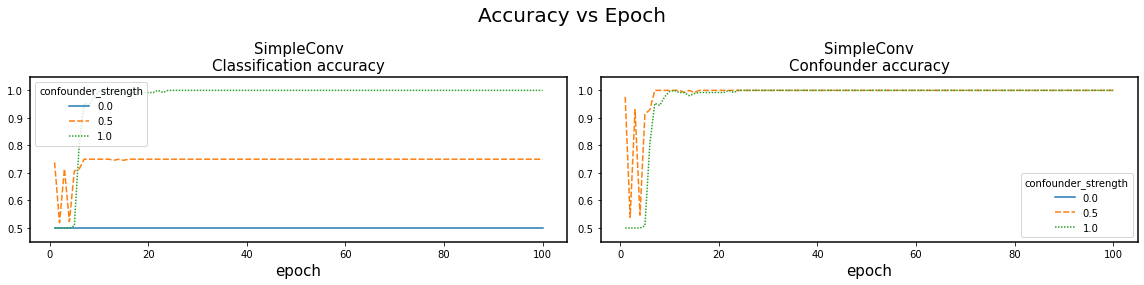

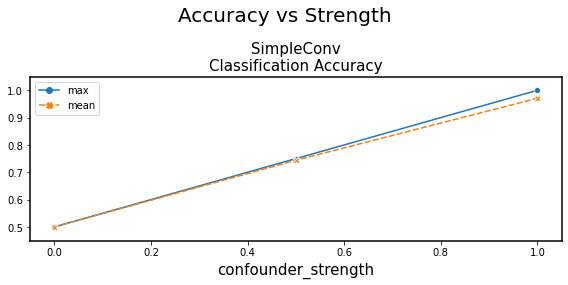

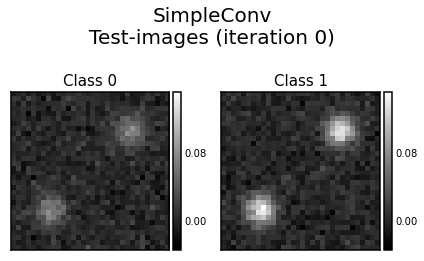

In [12]:
importlib.reload(CI)
c.plot(accuracy_vs_epoch=True, test_images=True, accuracy_vs_strength=True)

In [14]:
epochs = 500

CUDA detected
Computation took 1 min and 40 s


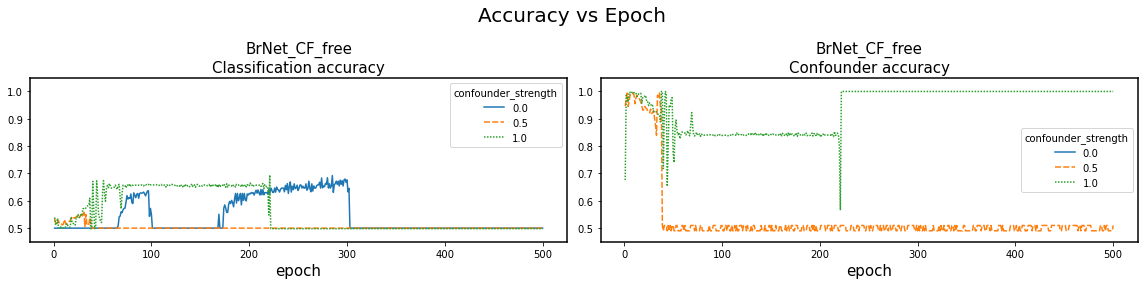

In [28]:
#torch.backends.cudnn.benchmark = True
c = CI.confounder(start_timer=True)
model = Models.Br_Net_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=epochs, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.01})
c.plot(accuracy_vs_epoch=True)
c.show_time()

CUDA detected
Computation took 1 min and 43 s


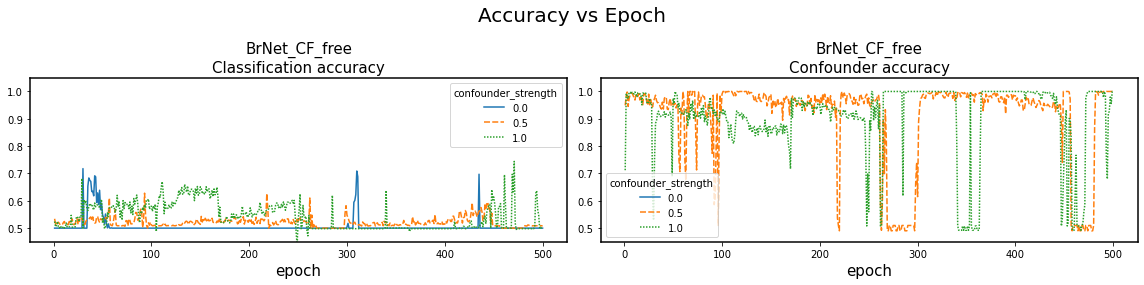

In [29]:
#torch.backends.cudnn.benchmark = True
c = CI.confounder(start_timer=True)
model = Models.Br_Net_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=epochs, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.01, 'weight_decay':0.001})
c.plot(accuracy_vs_epoch=True)
c.show_time()

CUDA detected
Computation took 1 min and 44 s


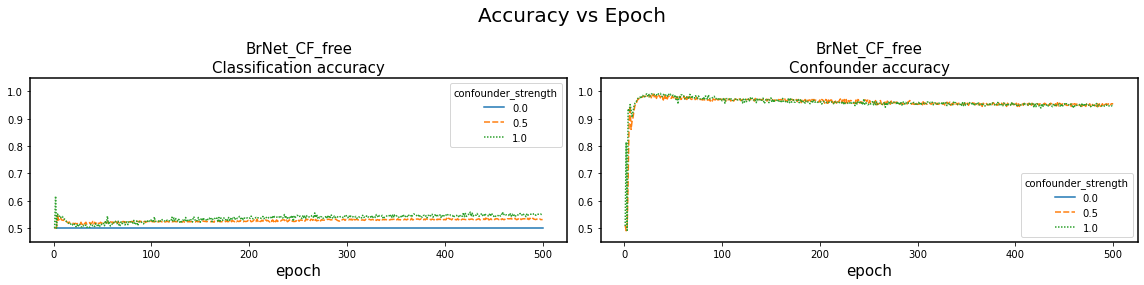

In [31]:
#torch.backends.cudnn.benchmark = True
c = CI.confounder(start_timer=True)
model = Models.Br_Net_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=epochs, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, 'weight_decay':0.001})
c.plot(accuracy_vs_epoch=True)
c.show_time()

In [ ]:
#torch.backends.cudnn.benchmark = True
c = CI.confounder(start_timer=True)
model = Models.Br_Net_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.5), de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=epochs, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)
c.show_time()

CUDA detected


In [26]:
import torch
t1 = torch.tensor(0).item()
print(t1)
t2 = torch.tensor(1).item()
print(t2)
t = torch.stack((t1,t2), dim=0)
print(t)
torch.corrcoef(t)

0
1


TypeError: expected Tensor as element 0 in argument 0, but got int

In [33]:
tt = torch.Tensor([1,1,1])
print(tt)
ttt = tt[tt==0]
print(ttt.dim())

tensor([1., 1., 1.])
1


In [41]:
import numpy as np
real, pred = torch.Tensor(np.array(0)), torch.Tensor(np.array(0))
real = real.reshape(len(real),1)
pred = torch.squeeze(pred)
real = torch.squeeze(real)
print(real.dim())

1


In [44]:
t = torch.empty(1)
print(t.dim())

1
